In [ ]:
# Nama        : Alfian Mohamad Firdaus

# NIM         : 1103204002

# Link ChatGPT : https://chat.openai.com/share/6b5aa104-5e4f-4f27-a110-28c9f4faf6d2

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/Dataset/Mall_Customers.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Tampilkan DataFrame
print(df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
# Menghapus kolom 'CustomerID'
df.drop('CustomerID', axis=1, inplace=True)

# Menampilkan dataframe setelah menghapus kolom
print(df)


      Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


In [10]:
# Mengubah nama kolom 'Genre' menjadi 'Gender'
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Menampilkan dataframe setelah mengubah nama kolom
print(df)


     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


In [12]:
df['Gender'] = df['Gender'].map({'male':0 , 'female':1})

df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,NaN,19,15,39
1,NaN,21,15,81
2,NaN,20,16,6
3,NaN,23,16,77
4,NaN,31,17,40
...,...,...,...,...
195,NaN,35,120,79
196,NaN,45,126,28
197,NaN,32,126,74
198,NaN,32,137,18


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

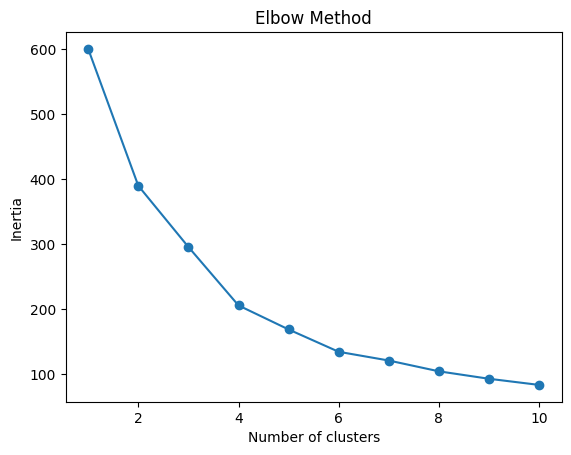

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Penskalaan fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Melakukan iterasi untuk berbagai nilai k dan menghitung inersia
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Penskalaan fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Membuat dan melatih model K-means dengan 5 cluster
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

# Menambahkan label cluster ke dataframe
df['Cluster'] = kmeans.labels_

# Menampilkan dataframe dengan label cluster
print(df)


     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       NaN   19                  15                      39        2
1       NaN   21                  15                      81        2
2       NaN   20                  16                       6        3
3       NaN   23                  16                      77        2
4       NaN   31                  17                      40        2
..      ...  ...                 ...                     ...      ...
195     NaN   35                 120                      79        1
196     NaN   45                 126                      28        4
197     NaN   32                 126                      74        1
198     NaN   32                 137                      18        4
199     NaN   30                 137                      83        1

[200 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


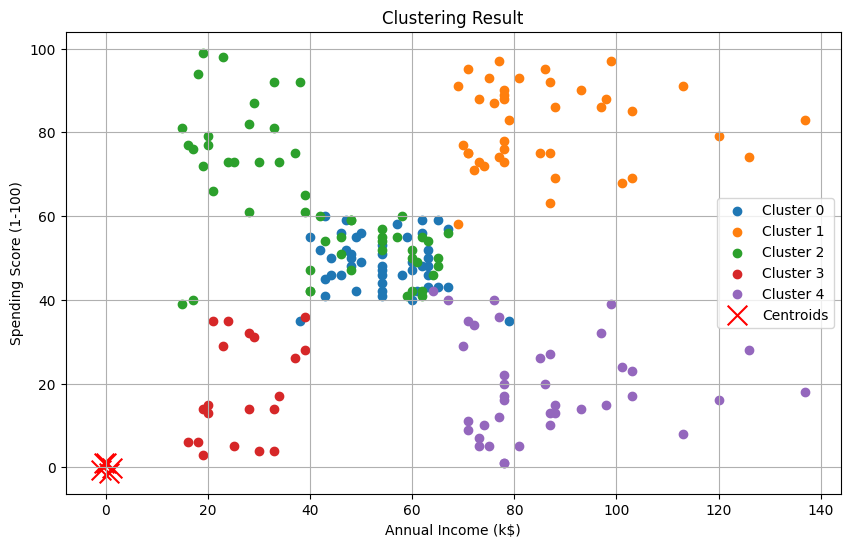

In [15]:
import matplotlib.pyplot as plt

# Plot scatter plot untuk setiap cluster
plt.figure(figsize=(10, 6))
for cluster in range(5):  # Menggunakan 5 cluster sesuai dengan yang Anda tentukan sebelumnya
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')

# Plot centroid dari setiap cluster
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Result')
plt.legend()
plt.grid(True)
plt.show()


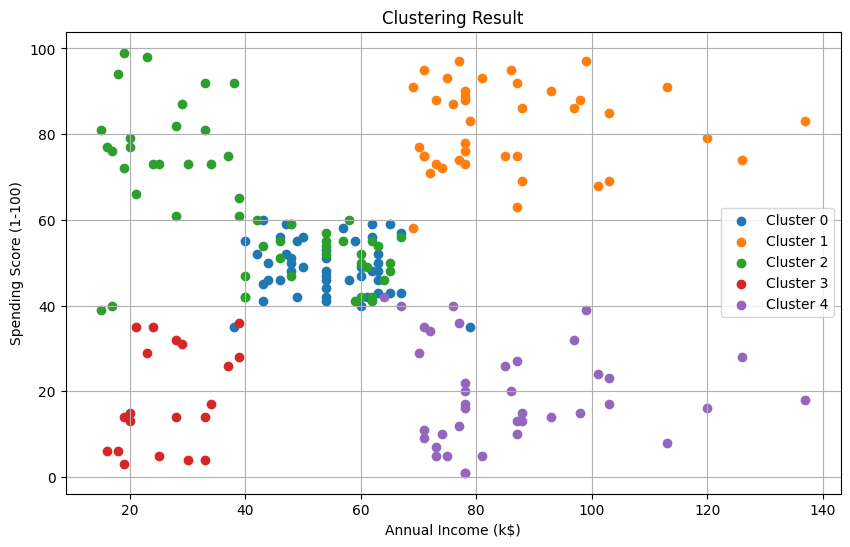

In [16]:
import matplotlib.pyplot as plt

# Memisahkan data berdasarkan label kluster
cluster0 = df[df['Cluster'] == 0]
cluster1 = df[df['Cluster'] == 1]
cluster2 = df[df['Cluster'] == 2]
cluster3 = df[df['Cluster'] == 3]
cluster4 = df[df['Cluster'] == 4]

# Plotting scatter plot untuk masing-masing kluster
plt.figure(figsize=(10, 6))
plt.scatter(cluster0['Annual Income (k$)'], cluster0['Spending Score (1-100)'], label='Cluster 0')
plt.scatter(cluster1['Annual Income (k$)'], cluster1['Spending Score (1-100)'], label='Cluster 1')
plt.scatter(cluster2['Annual Income (k$)'], cluster2['Spending Score (1-100)'], label='Cluster 2')
plt.scatter(cluster3['Annual Income (k$)'], cluster3['Spending Score (1-100)'], label='Cluster 3')
plt.scatter(cluster4['Annual Income (k$)'], cluster4['Spending Score (1-100)'], label='Cluster 4')

# Menambahkan label sumbu dan judul
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Result')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

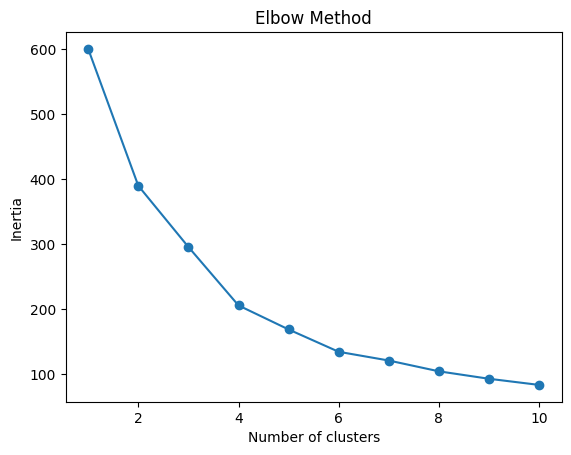

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Penskalaan fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Melakukan iterasi untuk berbagai nilai k dan menghitung inersia
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
